In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Preprocessing 1
import pandas as pd

# Load the dataset
df = pd.read_csv(r'/content/drive/MyDrive/Colab/DataVisualization/Project/heart.csv')
df.head()

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('heart_cleaned.csv', index=False)

# Display the number of rows before and after removing duplicates
print(f"Number of rows before removing duplicates: {df.shape[0]}")
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of rows before removing duplicates: 1025
Number of rows after removing duplicates: 302


In [ ]:
#Preprocessing
# check for missing values

df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


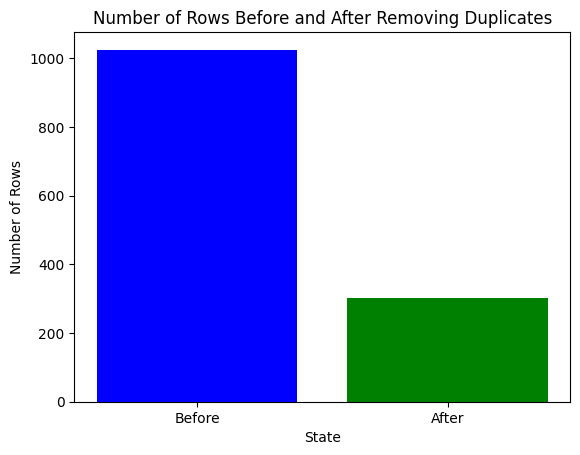

In [8]:
#Preprocessing 2
# Create a bar graph to show the number of rows before and after removing duplicates
labels = ['Before', 'After']
values = [rows_before, rows_after]

plt.bar(labels, values, color=['blue', 'green'])
plt.xlabel('State')
plt.ylabel('Number of Rows')
plt.title('Number of Rows Before and After Removing Duplicates')
plt.show()

In [7]:
#Preprocessing 3
from sklearn.preprocessing import LabelEncoder

# Display the first few rows of the dataset before encoding
print("Dataset before encoding:")
print(df.head())

# Initialize the label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the label encoded dataset
print("\nDataset after label encoding:")
print(df.head())

Dataset before encoding:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset after label encoding:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
import pandas as pd


In [ ]:
!pip install ggplot

<ipython-input-20-87d59682ab59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='chol', data=df, palette='Set3')


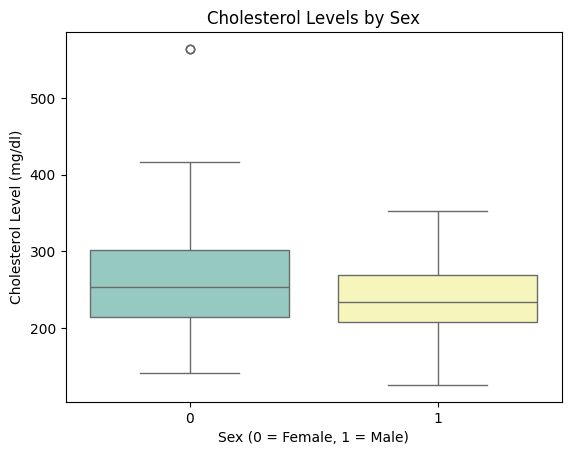

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create box plot for cholesterol levels by sex
sns.boxplot(x='sex', y='chol', data=df, palette='Set3')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.title('Cholesterol Levels by Sex')
plt.show()

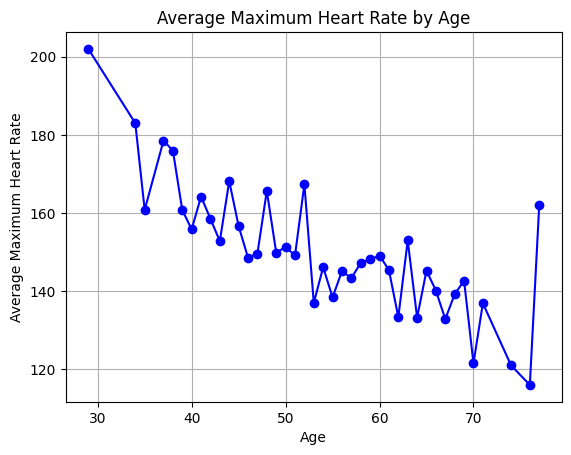

In [ ]:
import matplotlib.pyplot as plt

# Calculate average maximum heart rate by age
avg_hr_by_age = df.groupby('age')['thalach'].mean().reset_index()

# Create line chart
plt.plot(avg_hr_by_age['age'], avg_hr_by_age['thalach'], marker='o', linestyle='-', color='b')
plt.xlabel('Age')
plt.ylabel('Average Maximum Heart Rate')
plt.title('Average Maximum Heart Rate by Age')
plt.grid(True)
plt.show()

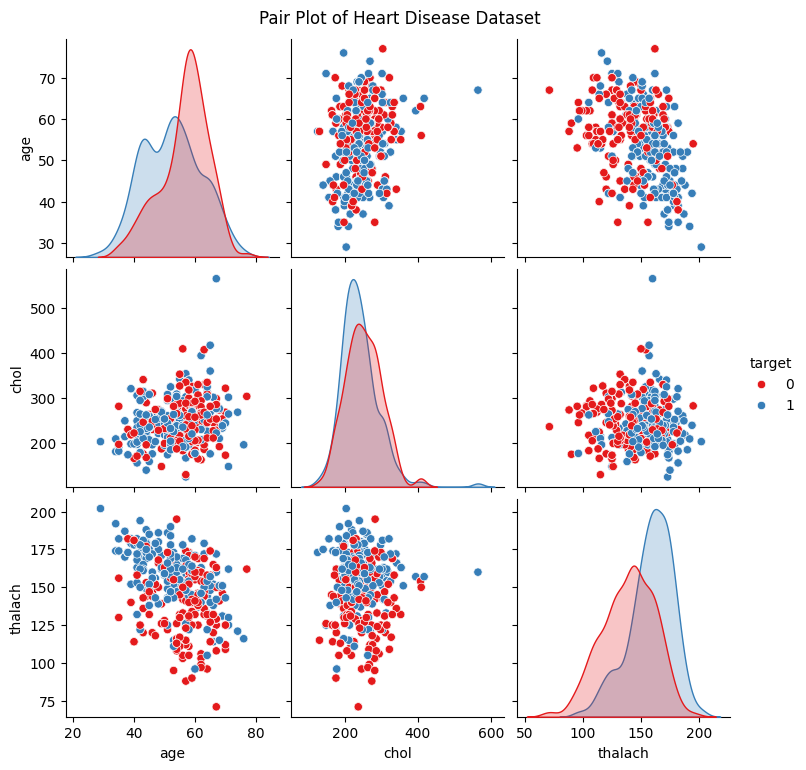

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create pair plot
sns.pairplot(df[['age', 'chol', 'thalach', 'target']], hue='target', palette='Set1')
plt.suptitle('Pair Plot of Heart Disease Dataset', y=1.02)
plt.show()

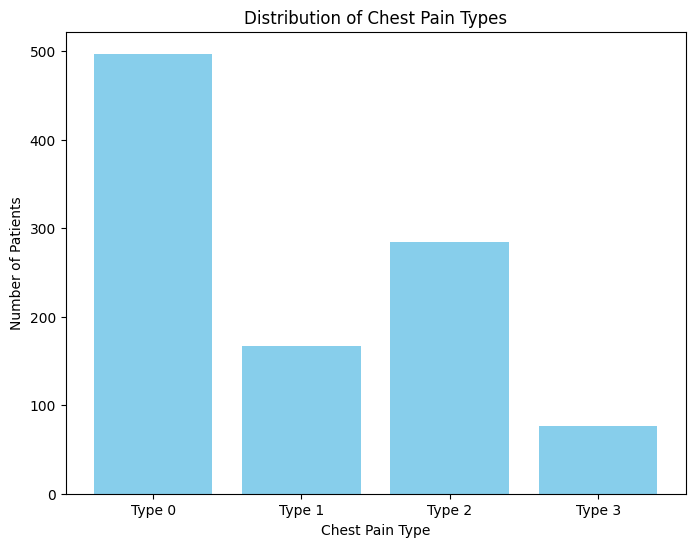

In [ ]:
import matplotlib.pyplot as plt


# Create a bar chart for the distribution of chest pain types
cp_counts = df['cp'].value_counts().sort_index()
cp_labels = ['Type 0', 'Type 1', 'Type 2', 'Type 3']

plt.figure(figsize=(8, 6))
plt.bar(cp_labels, cp_counts, color='skyblue')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.title('Distribution of Chest Pain Types')
plt.show()


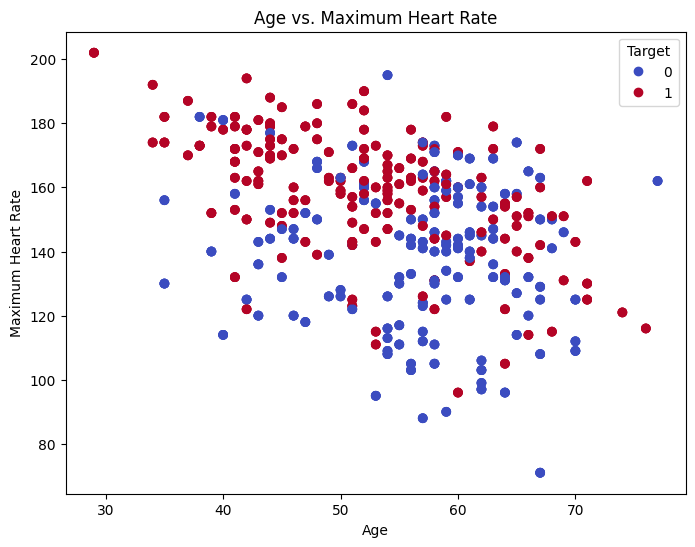

In [ ]:

import matplotlib.pyplot as plt

# Create a scatter plot for age vs. maximum heart rate
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['age'], df['thalach'], c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Age vs. Maximum Heart Rate')
plt.legend(*scatter.legend_elements(), title="Target")
plt.show()


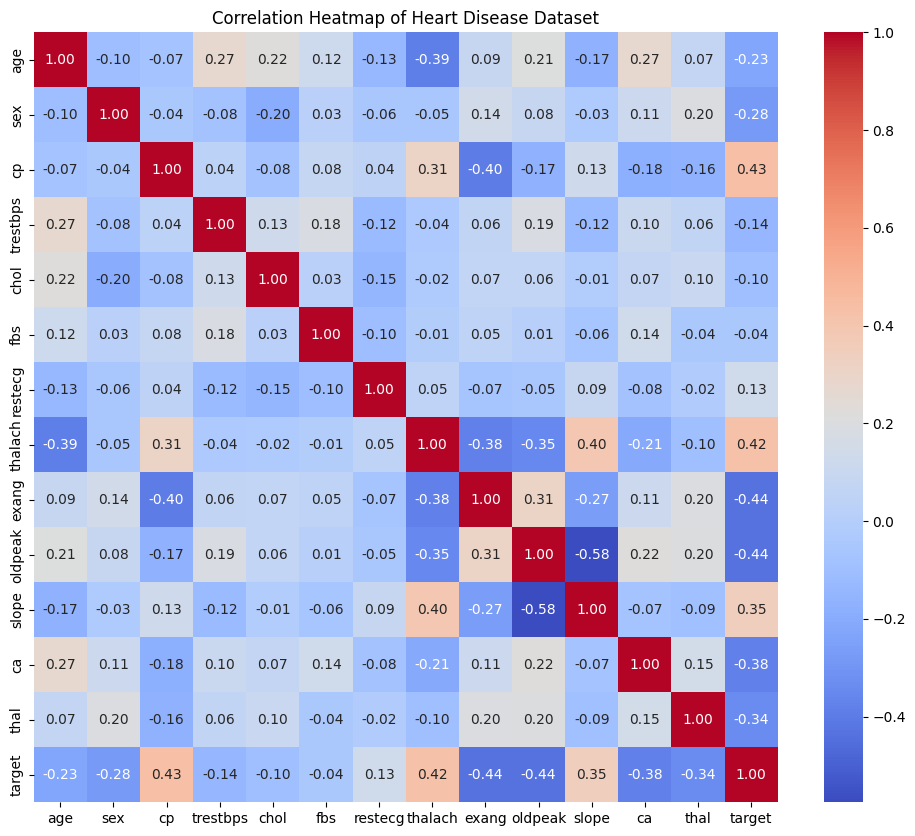

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix of the dataset
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()


In [ ]:
df['cp'].nunique()

4

In [ ]:
df['cp'].value_counts()

,count
cp,
0,497
2,284
1,167
3,77


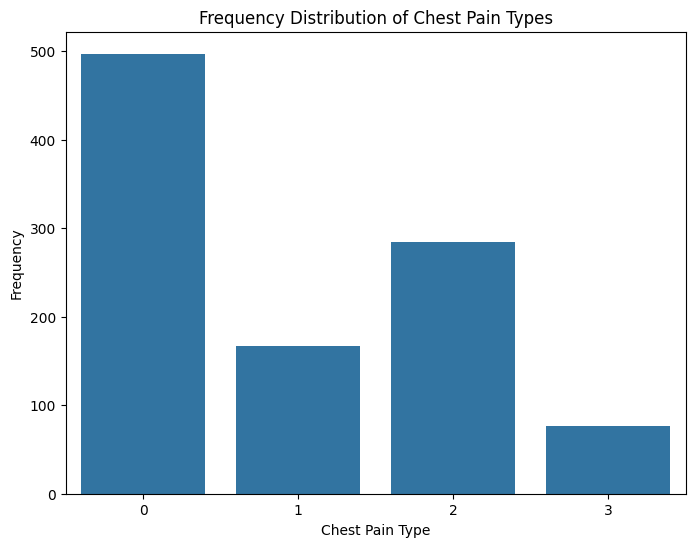

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart for the distribution of chest pain types
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", data=df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Chest Pain Types')
plt.show()


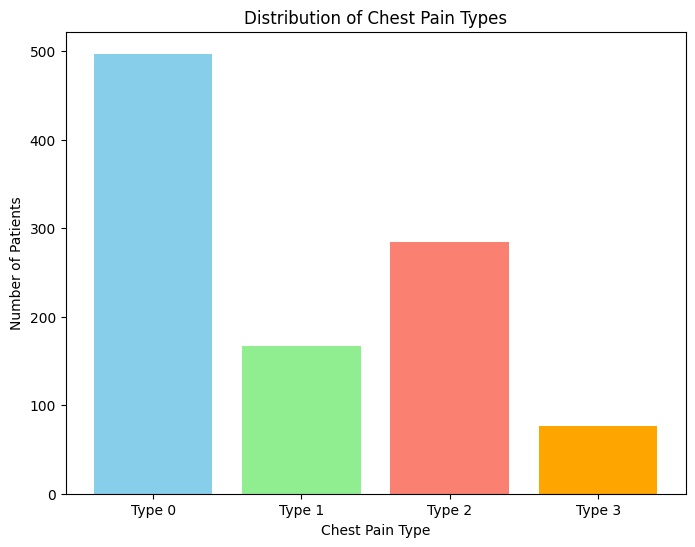

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for the distribution of chest pain types
cp_counts = df['cp'].value_counts().sort_index()
cp_labels = ['Type 0', 'Type 1', 'Type 2', 'Type 3']

plt.figure(figsize=(8, 6))
plt.bar(cp_labels, cp_counts, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.title('Distribution of Chest Pain Types')
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Implement Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7951219512195122

Confusion Matrix:
[[73 29]
 [13 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



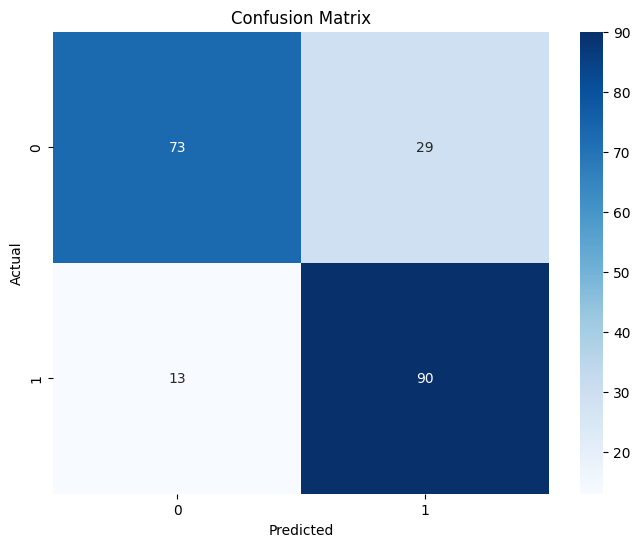

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()